# Basin DoM

In [1]:
import numpy as np
import dom

In [2]:
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['text.usetex'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.direction'] = 'in'
import matplotlib.pyplot as plt
mpl.rcParams['font.size'] = 34
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['patch.linewidth'] = 3
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.size'] = 15
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 15
mpl.rcParams['ytick.major.width'] = 2
from matplotlib.patches import ConnectionPatch

In [9]:
from equation import solve4beta
def basin_opt(mu, gap, bscale='linear', xrange=15., opt_win=None):
    """Plot optimal window for a basin-shaped DoM
    
    Args:
        bscale: scale of beta. Can be 'linear' or 'log'.
    """
    dom_basin = lambda x: dom.basin(x, mu, gap)
    if opt_win:
        opt_win = np.loadtxt(opt_win, delimiter=',')
    else:
        opt_win = solve4beta(dom_basin, beta_range=np.logspace(-7, 1, 401), guess=[2,6])
        np.savetxt('basin/{}_{}.csv'.format(mu,gap), opt_win, delimiter=',')
    _, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(13, 17))
    x_range = np.linspace(-xrange, xrange, 500)
    ax1.plot(x_range, dom_basin(x_range), 'k')
    ax1.set_xlabel('$x$')
    ax1.set_ylabel('$M$')
    ax1.set_xlim(-xrange,xrange)
    ax1.set_ylim(0,10)
    ax1.set_yticks([0,4,8])
    ax1.text(0.2, 0.9, '(a)',transform=ax1.transAxes)
    ax2.plot(opt_win[:,0], opt_win[:,1], '#1f77b4', label=r'$x_1$')
    ax2.plot(opt_win[:,0], opt_win[:,2], '#ff7f0e', label=r'$x_2$')
    ax2.legend()
    ax2.set_xlabel(r'$1/\beta$')
    ax2.set_ylabel('$x$')
    ax2.set_ylim(0, 12)
    ax2.text(0.2, 0.9, '(b)',transform=ax2.transAxes)
    ax3.plot(opt_win[:,0], opt_win[:,3], '#d62728')
    ax3.set_xlabel(r'$1/\beta$')
    ax3.set_ylabel('$zT$')
    ax3.text(0.2, 0.9, '(c)',transform=ax3.transAxes)
    match bscale:
        case 'linear':
            ax2.set_xlim(0, 30)
            ax3.set_xlim(0, 30)
            ax3.set_ylim(0, 50)
        case 'log':
            ax2.set_xlim(1e-1, 1e5)
            ax2.set_xscale("log", base=10)
            ax3.set_xlim(1e-1, 1e5)
            ax3.set_xscale("log", base=10)
            ax3.set_ylim(0.1,1e4)
            ax3.set_yscale("log", base=10)
    plt.tight_layout()

beta start at 1.0


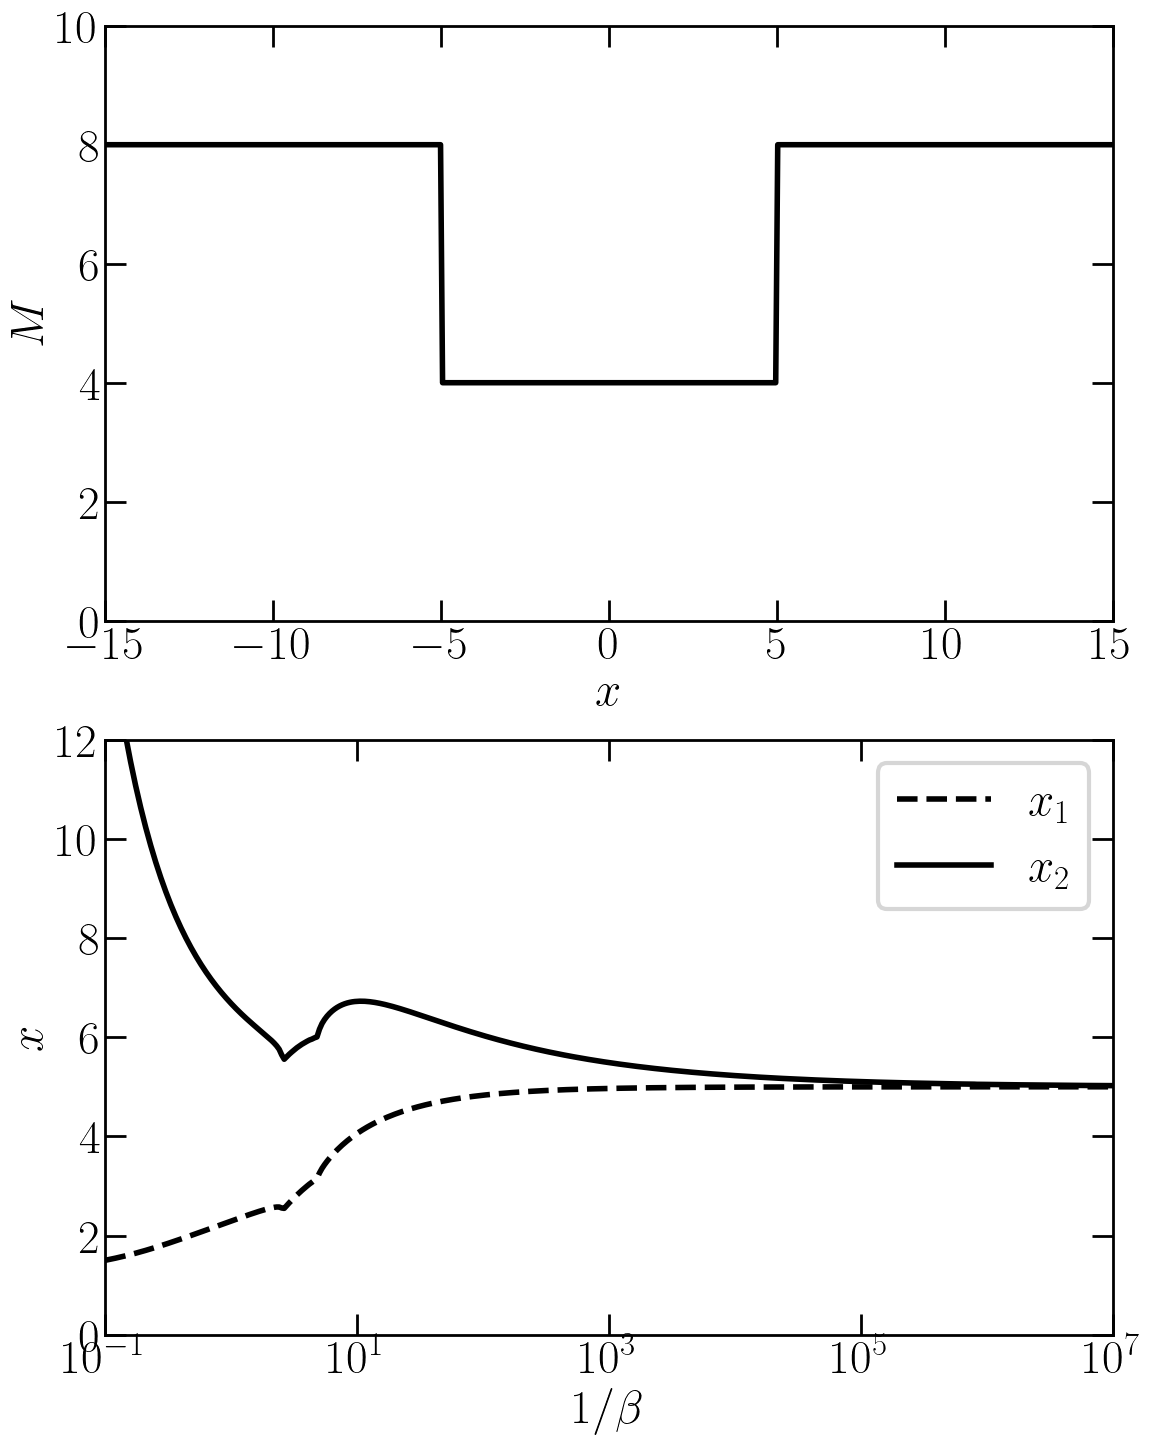

In [ ]:
basin_opt(0, 10, bscale='log')

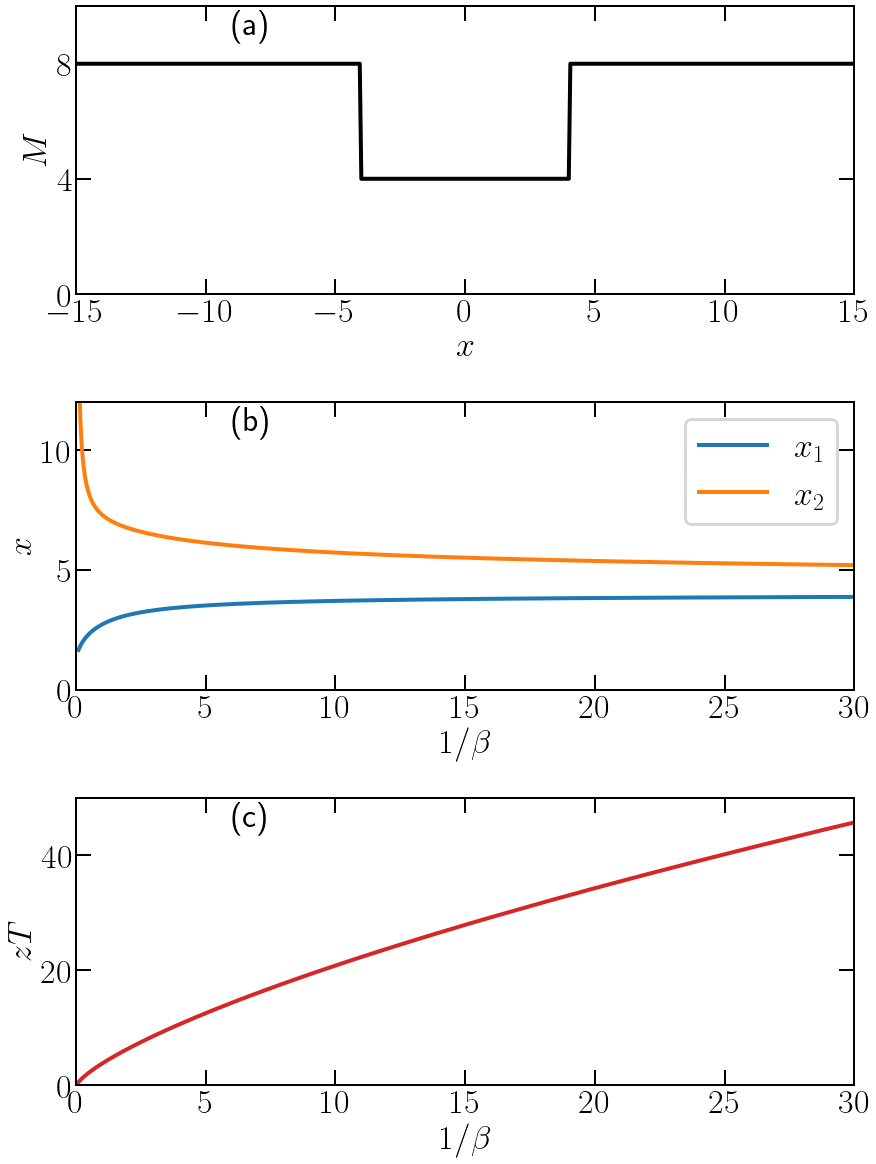

In [ ]:
basin_opt(0, 8, opt_win='basin_0_8.csv')

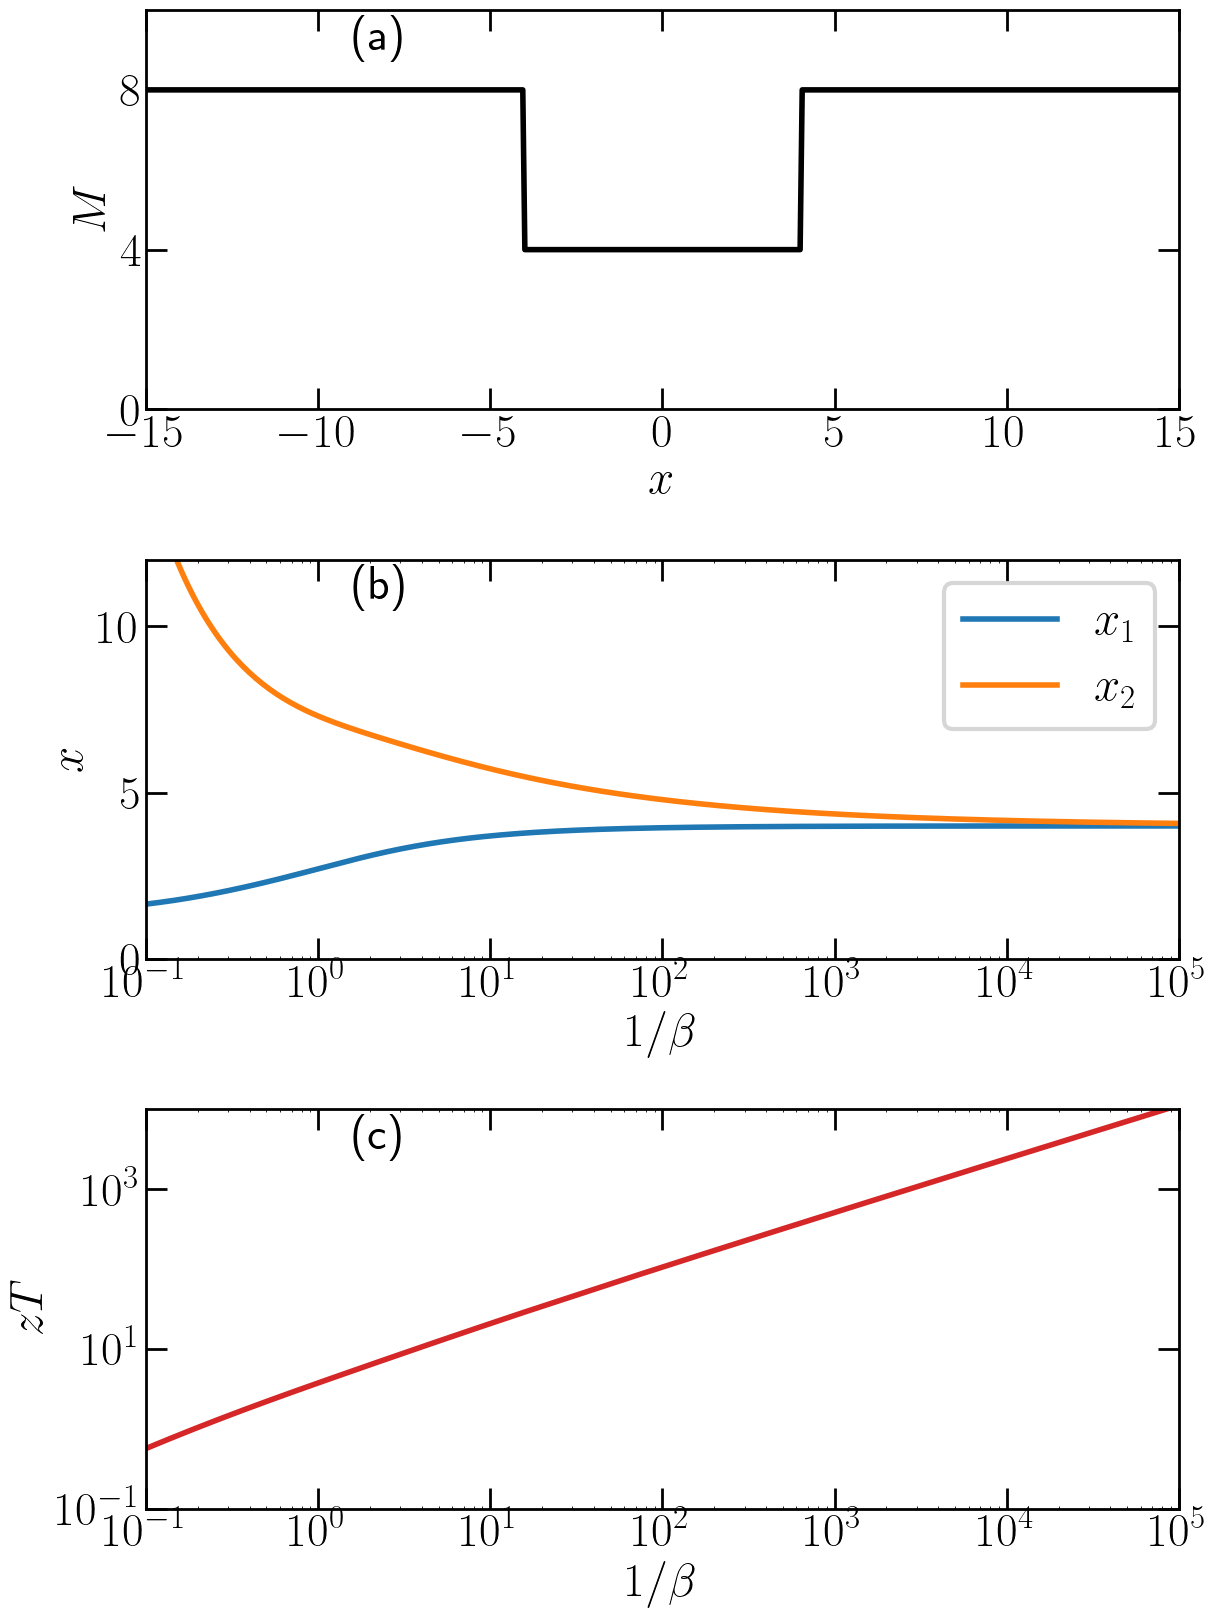

In [10]:
basin_opt(0, 8, bscale='log', opt_win='basin_0_8.csv')